In [1]:
#pip install vnstock, pandas, ta-lib, mplfinance

In [37]:
from vnstock import Vnstock
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [65]:
stock = Vnstock().stock(symbol='BVS', source='VCI')
df = stock.quote.history(start='2020-03-30', end='2025-03-30', interval='1D')
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
#df['SMA_20'] = talib.SMA(df['close'], timeperiod=20)
#df['SMA_100'] = talib.SMA(df['close'], timeperiod=100)
df.to_csv("BVS_stock_data_with_indicators.csv")
df.tail()

,open,high,low,close,volume
time,,,,,
2025-03-24,41.4,41.4,39.7,40.9,826900
2025-03-25,41.6,41.6,39.8,40.3,1279900
2025-03-26,40.3,40.3,38.9,39.2,1178500
2025-03-27,39.2,39.4,38.6,38.7,824600
2025-03-28,38.7,39.4,38.2,38.6,820200





            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.



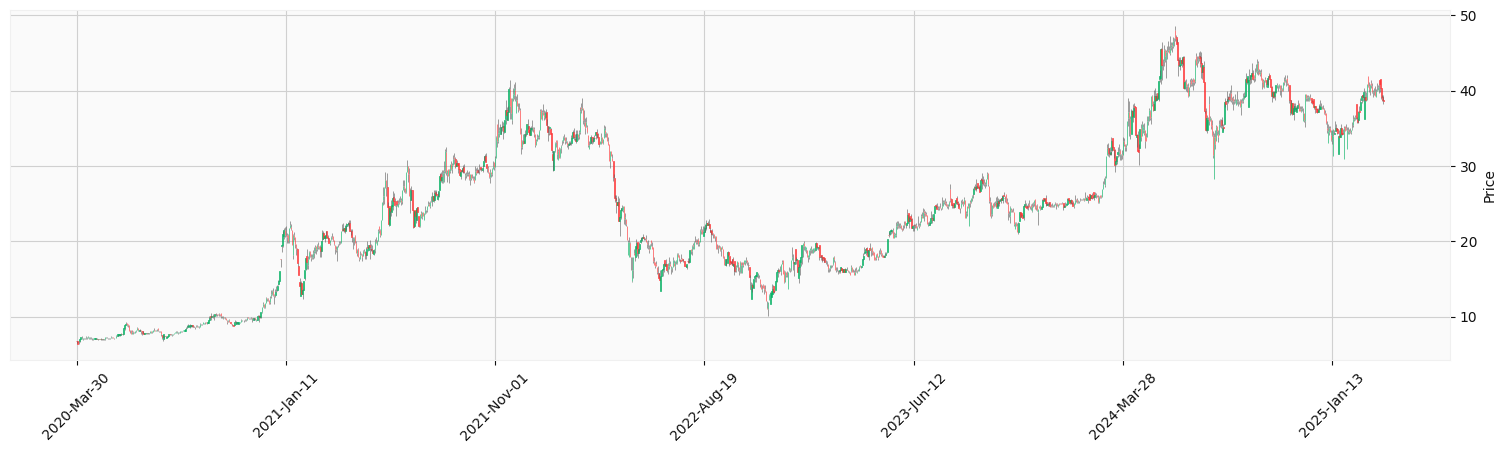

In [39]:
mpf.plot(df, 
         type='candle', 
         style='yahoo', 
         ylabel='Price', 
         volume=False,
         figsize = (20, 5)
) 

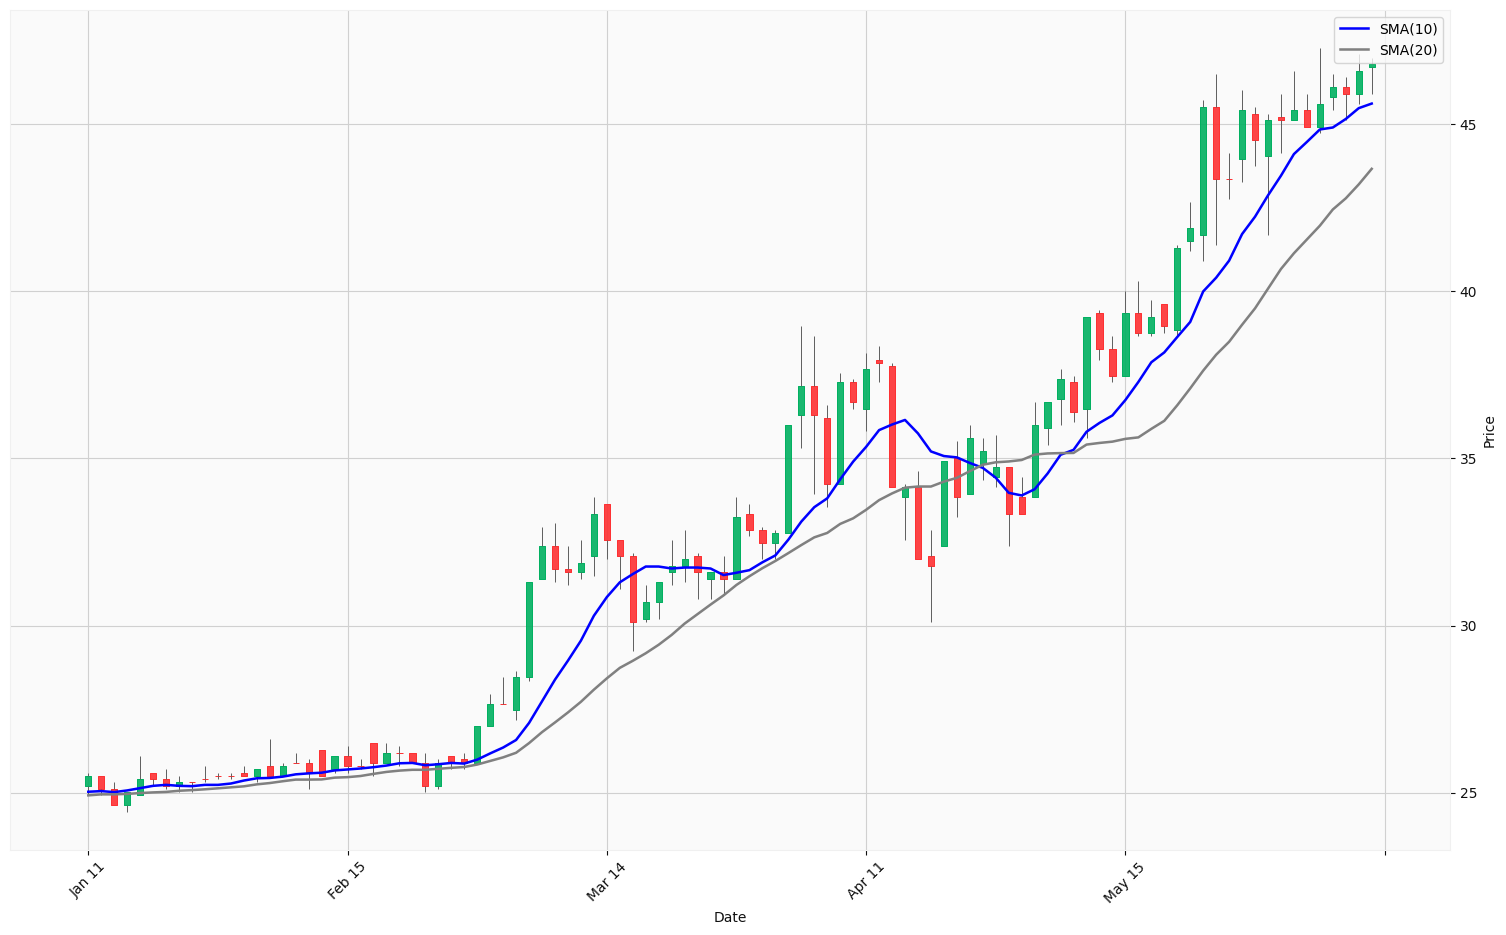

In [40]:
df['SMA_10'] = talib.SMA(df['close'], timeperiod=10)
df['SMA_20'] = talib.SMA(df['close'], timeperiod=20)
addplots = [
    mpf.make_addplot(df['SMA_10'].iloc[950:1050], color='blue', label='SMA(10)'),
    mpf.make_addplot(df['SMA_20'].iloc[950:1050], color='gray', label='SMA(20)'),
]
mpf.plot(df.iloc[950:1050], 
         type='candle', 
         style='yahoo', 
         xlabel='Date',
         ylabel='Price', 
         addplot= addplots,
         volume=False,
         figsize =(20,12),
         show_nontrading=False
)

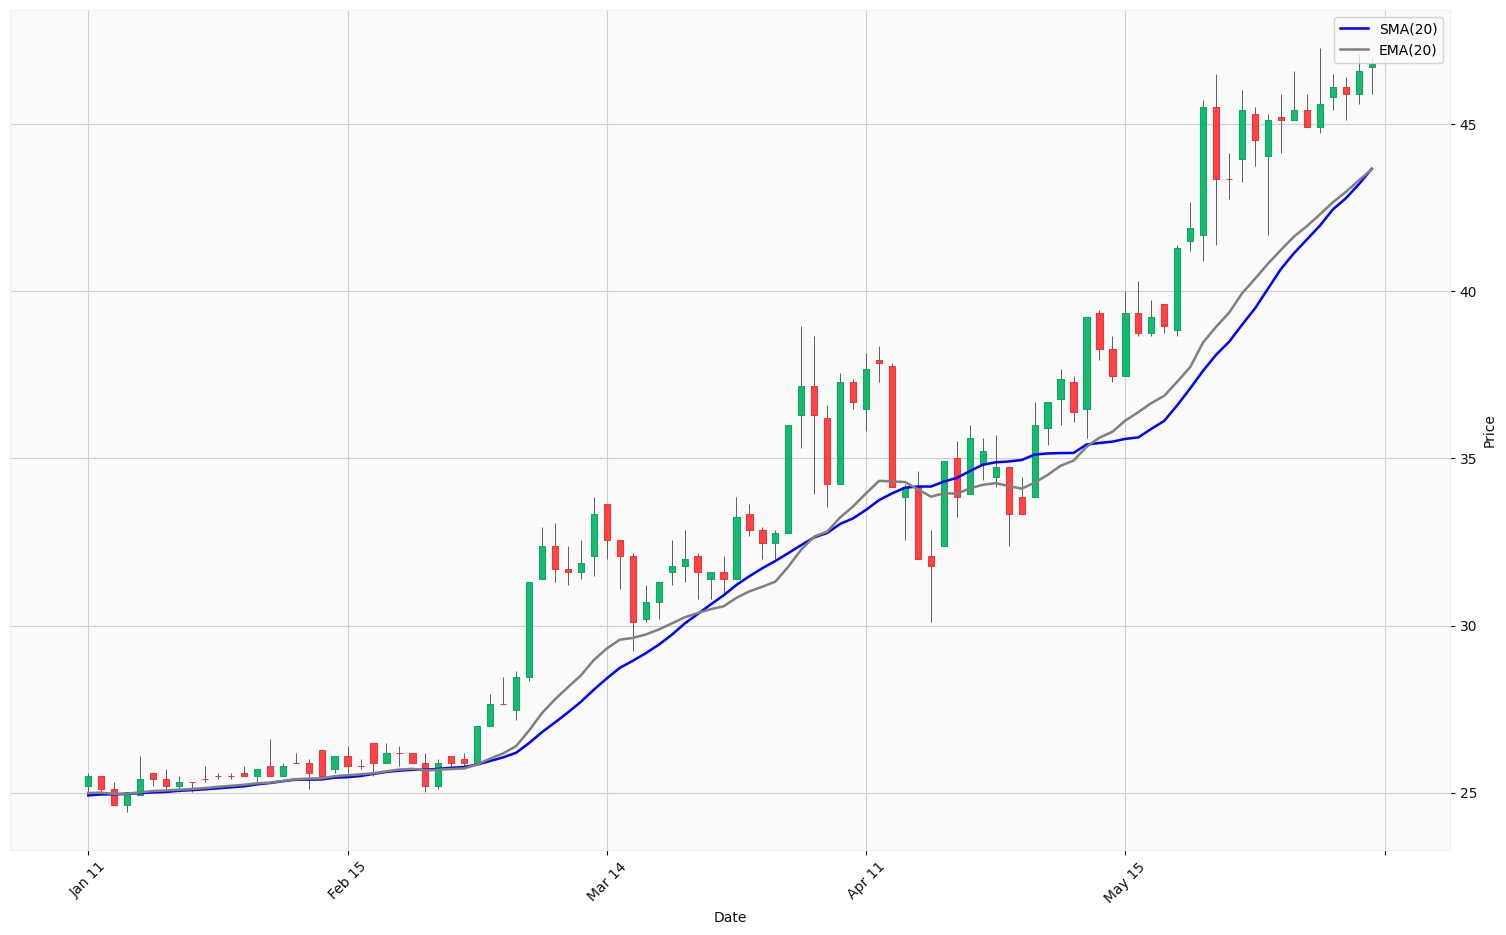

In [41]:

df['EMA_20'] = talib.EMA(df['close'], timeperiod=20)
addplots = [
    mpf.make_addplot(df['SMA_20'].iloc[950:1050], color='blue', label='SMA(20)'),
    mpf.make_addplot(df['EMA_20'].iloc[950:1050], color='gray', label='EMA(20)'),
]
mpf.plot(df.iloc[950:1050], 
         type='candle', 
         style='yahoo', 
         xlabel='Date',
         ylabel='Price', 
         addplot= addplots,
         volume=False,
         figsize =(20,12),
         show_nontrading=False
)

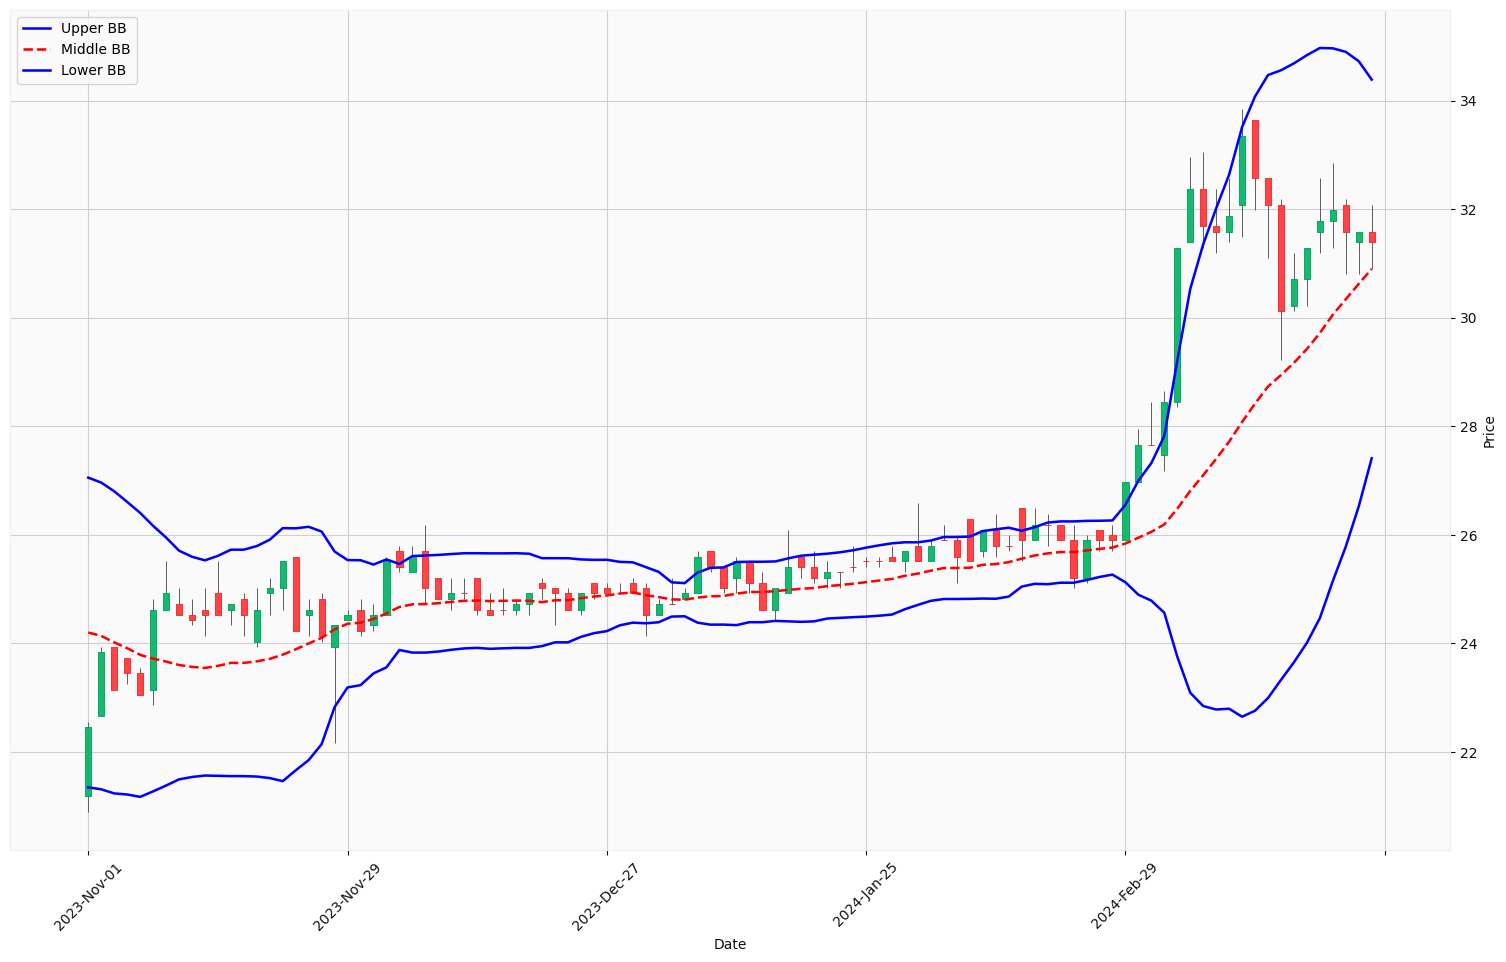

In [42]:
df["Upper_BB"], df["Middle_BB"], df["Lower_BB"] = talib.BBANDS(df["close"], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
addplots = [

    mpf.make_addplot(df['Upper_BB'].iloc[900:1000], color='blue', linestyle='-', label='Upper BB'),
    mpf.make_addplot(df['Middle_BB'].iloc[900:1000], color='red', linestyle='--', label='Middle BB'),
    mpf.make_addplot(df['Lower_BB'].iloc[900:1000], color='blue', linestyle='-', label='Lower BB'),
]
mpf.plot(df.iloc[900:1000], 
         type='candle', 
         style='yahoo', 
         xlabel='Date',
         ylabel='Price', 
         addplot= addplots,
         volume=False,
         figsize =(20,12),
         show_nontrading=False
)

In [8]:
#SMA Crossover

In [64]:
df['SMA_20'] = talib.SMA(df['close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['close'], timeperiod=50)

In [55]:
df['Signal'] = 0
df.loc[df.index[20:], 'Signal'] = (df['SMA_20'].iloc[50:] > df['SMA_50'].iloc[50:]).astype(int)
df['Position'] = df['Signal'].diff()
df['Buy_Signal'] = np.where(df['Position'] == 1, df['SMA_20'], np.nan)
df['Sell_Signal'] = np.where(df['Position'] == -1, df['SMA_20'], np.nan)
df_signals= df[pd.notna(df['Buy_Signal']) | pd.notna(df['Sell_Signal'])][['close', 'SMA_10', 'SMA_50', 'Position', 'Buy_Signal', 'Sell_Signal']]
print(df_signals)
#df.to_csv("BVS_stock_data_with_indicators.csv")
#df.tail()

            close  SMA_10   SMA_50  Position  Buy_Signal  Sell_Signal
time                                                                 
2020-07-27   7.29   8.043   7.9622      -1.0         NaN       7.9595
2020-08-28   8.75   8.190   7.9444       1.0      7.9525          NaN
2020-11-11   9.59   9.231   9.4108      -1.0         NaN       9.3935
2020-12-04   9.94   9.812   9.6984       1.0      9.7150          NaN
2021-03-01  19.54  18.480  16.9980      -1.0         NaN      16.9175
2021-03-04  18.74  18.770  17.4028       1.0     17.4410          NaN
2021-05-07  18.13  18.260  19.9088      -1.0         NaN      19.7600
2021-06-01  26.05  21.649  20.1378       1.0     20.2410          NaN
2021-07-29  24.64  23.655  24.7210      -1.0         NaN      24.6440
2021-08-18  28.51  26.831  25.4688       1.0     25.6125          NaN
2021-10-22  28.58  29.849  29.2744      -1.0         NaN      29.2605
2021-10-28  30.03  29.777  29.4406       1.0     29.4555          NaN
2021-12-28  33.81  3




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.



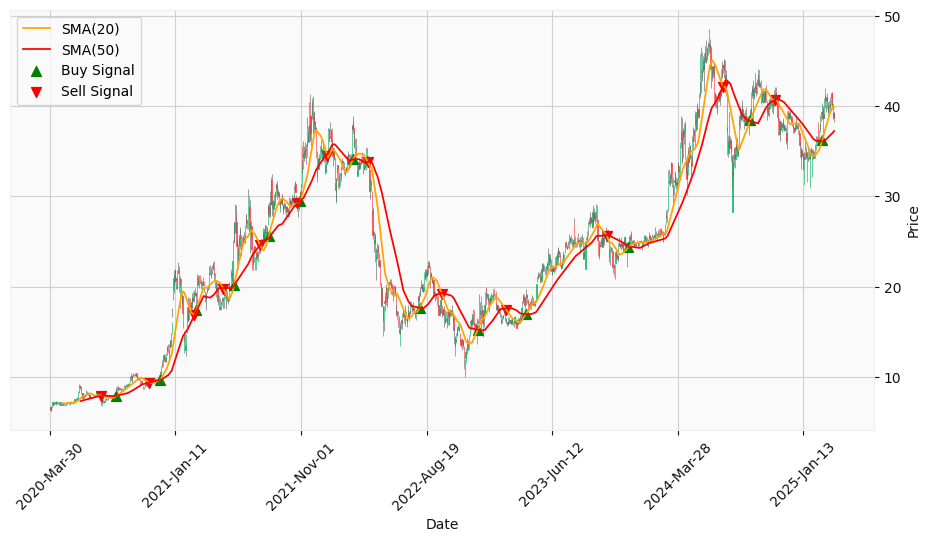

In [56]:
addplots = [
    #mpf.make_addplot(df['close'], label='Close Price', color='blue'),
    mpf.make_addplot(df['SMA_20'], label='SMA(20)', color='orange'),
    mpf.make_addplot(df['SMA_50'], label='SMA(50)', color='red'),
    mpf.make_addplot(df['Buy_Signal'], type='scatter', markersize=50, marker='^', color='green', label='Buy Signal'),
    mpf.make_addplot(df['Sell_Signal'], type='scatter', markersize=50, marker='v', color='red', label='Sell Signal'),
]
mpf.plot(df, 
         type='candle',
         style='yahoo', 
         xlabel='Date',
         ylabel='Price', 
         addplot=addplots, 
         volume=False,
         figsize = (12, 6),
         show_nontrading=False
         )

In [67]:
trades = []
buy_price = None
buy_date = None
for index, row in df_signals.iterrows():
    if row['Position']==1.0:
        buy_price = row['close']
        buy_date = index
    elif  row['Position'] ==-1.0 and buy_price is not None:
        sell_price = row['close']
        sell_date = index
        profit = sell_price - buy_price
        trades.append({
            'Buy_Date': buy_date,
            'Buy_Price': buy_price,
            'Sell_Date': sell_date,
            'Sell_Price': sell_price,
            'Profit': profit
        })
        buy_price= None
df_trades = pd.DataFrame(trades)
print(df_trades)
df_trades['Return_%'] = df_trades['Profit'] / df_trades['Buy_Price'] * 100
print(f"\nTotal return: {df_trades['Return_%'].sum():.2f}%")
print("Number of trades:", len(df_trades))
print(f"Win rate:  {len(df_trades[df_trades['Profit'] > 0]) / len(df_trades) * 100:.2f}%")
print(f"Average return per trade: {df_trades['Return_%'].mean():.2f}%")

     Buy_Date  Buy_Price  Sell_Date  Sell_Price  Profit
0  2020-08-28       8.75 2020-11-11        9.59    0.84
1  2020-12-04       9.94 2021-03-01       19.54    9.60
2  2021-03-04      18.74 2021-05-07       18.13   -0.61
3  2021-06-01      26.05 2021-07-29       24.64   -1.41
4  2021-08-18      28.51 2021-10-22       28.58    0.07
5  2021-10-28      30.03 2021-12-28       33.81    3.78
6  2022-03-04      37.69 2022-04-06       34.45   -3.24
7  2022-08-04      19.30 2022-09-26       16.95   -2.35
8  2022-12-15      16.14 2023-02-23       16.24    0.10
9  2023-04-10      18.88 2023-10-13       25.80    6.92
10 2023-11-30      24.23 2024-07-12       44.14   19.91
11 2024-09-13      39.14 2024-11-08       41.50    2.36

Total return: 215.04%
Number of trades: 12
Win rate:  66.67%
Average return per trade: 17.92%


In [12]:
#MACD

In [60]:
stock = Vnstock().stock(symbol='BVS', source='VCI')
df_MACD = stock.quote.history(start='2020-03-30', end='2025-03-30', interval='1D')
df_MACD['time'] = pd.to_datetime(df_MACD['time'])
df_MACD.set_index('time', inplace=True)
#df_MACD = df.copy()
df_MACD['EMA_12'] = talib.EMA(df_MACD['close'], timeperiod=12)
df_MACD['EMA_26'] = talib.EMA(df_MACD['close'], timeperiod=26)
df_MACD['MACD'], df_MACD['MACD_signal'], df_MACD['MACD_hist'] = talib.MACD(df_MACD['close'], fastperiod=12, slowperiod=26, signalperiod=9)
df_MACD.to_csv("BVS_stock_data_with_MACD_indicators.csv")
df_MACD.tail()

,open,high,low,close,volume,EMA_12,EMA_26,MACD,MACD_signal,MACD_hist
time,,,,,,,,,,
2025-03-24,41.4,41.4,39.7,40.9,826900,39.999226,39.038885,0.960341,1.029833,-0.069492
2025-03-25,41.6,41.6,39.8,40.3,1279900,40.045499,39.132301,0.913198,1.006506,-0.093308
2025-03-26,40.3,40.3,38.9,39.2,1178500,39.915422,39.137316,0.778106,0.960826,-0.182720
2025-03-27,39.2,39.4,38.6,38.7,824600,39.728434,39.104922,0.623512,0.893363,-0.269851
2025-03-28,38.7,39.4,38.2,38.6,820200,39.554829,39.067520,0.487309,0.812152,-0.324844


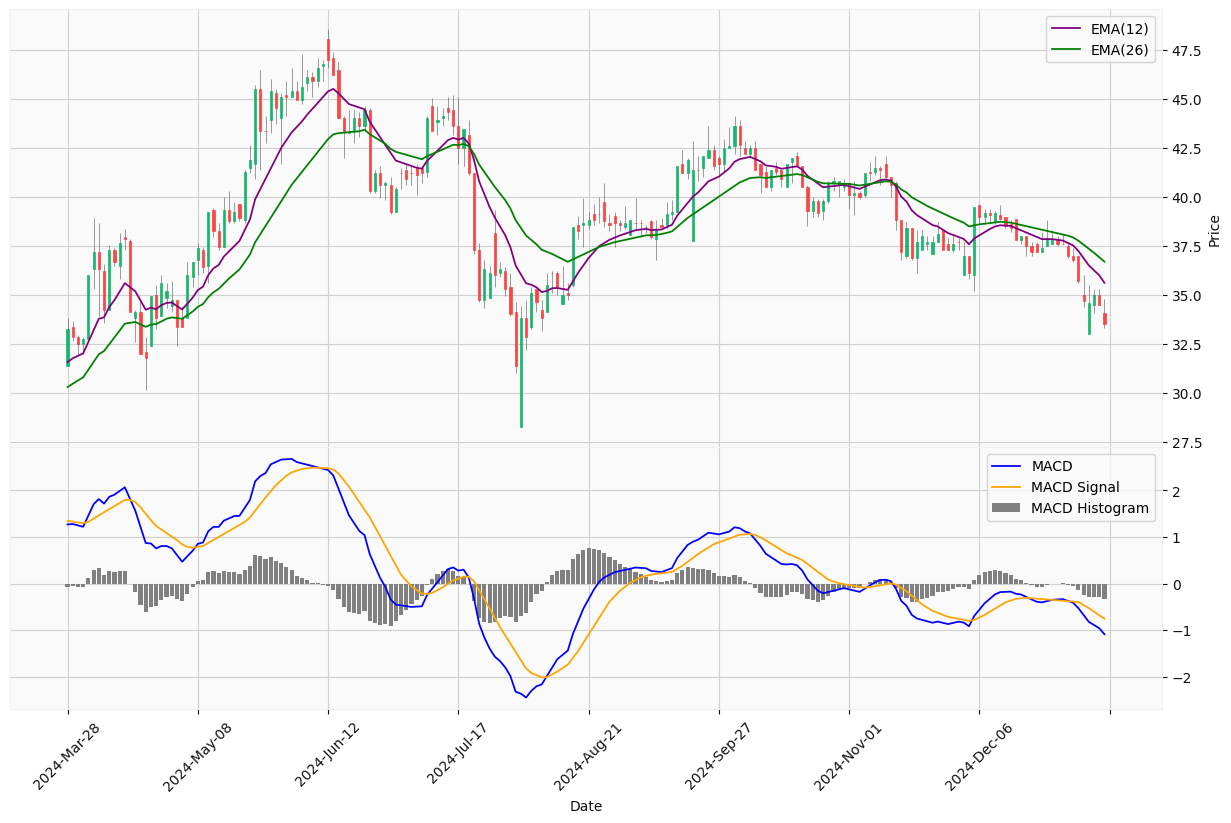

In [61]:
addplots = [
    mpf.make_addplot(df_MACD['EMA_12'].iloc[1000:1200], color='purple', label='EMA(12)'),
    mpf.make_addplot(df_MACD['EMA_26'].iloc[1000:1200], color='green', label='EMA(26)'),
    mpf.make_addplot(df_MACD['MACD'].iloc[1000:1200], color='blue', panel=1, label='MACD', secondary_y=False),
    mpf.make_addplot(df_MACD['MACD_signal'].iloc[1000:1200], color='orange', panel=1, label='MACD Signal',secondary_y=False),
    mpf.make_addplot(df_MACD['MACD_hist'].iloc[1000:1200], type='bar', color='grey', panel=1, label='MACD Histogram', secondary_y=False),
    #mpf.make_addplot([0]*100, color='gray', panel=1, linestyle='--')
]
mpf.plot(df_MACD.iloc[1000:1200], 
         type='candle', 
         style='yahoo',
         xlabel='Date', 
         ylabel='Price', 
         addplot=addplots, 
         volume=False,
         figsize = (16, 10),
         panel_ratios=(1, 0.6),
         show_nontrading=False
         )

In [15]:
#MACD Crossover

In [16]:
df_MACD['Signal'] = 0
df_MACD.loc[df.index[26:], 'Signal'] = (df_MACD['MACD'].iloc[26:] > df_MACD['MACD_signal'].iloc[26:]).astype(int)
df_MACD['Position'] = df_MACD['Signal'].diff()
df_MACD['Buy_Signal'] = np.where(df_MACD['Position'] == 1, df_MACD['MACD'], np.nan)
df_MACD['Sell_Signal'] = np.where(df_MACD['Position'] == -1, df_MACD['MACD'], np.nan)

df_MACD_signals = df_MACD[pd.notna(df_MACD['Buy_Signal']) | pd.notna(df_MACD['Sell_Signal'])][['close', 'MACD', 'MACD_signal', 'Position', 'Buy_Signal', 'Sell_Signal']]
print(df_MACD_signals)

            close      MACD  MACD_signal  Position  Buy_Signal  Sell_Signal
time                                                                       
2020-05-19   7.29  0.037991     0.027957       1.0    0.037991          NaN
2020-06-15   7.70  0.291686     0.313082      -1.0         NaN     0.291686
2020-07-15   8.18  0.039720     0.032475       1.0    0.039720          NaN
2020-07-24   7.70  0.024396     0.050400      -1.0         NaN     0.024396
2020-08-11   7.78 -0.090402    -0.103820       1.0   -0.090402          NaN
...           ...       ...          ...       ...         ...          ...
2024-12-20  37.20 -0.341709    -0.308684      -1.0         NaN    -0.341709
2024-12-26  37.80 -0.342537    -0.343855       1.0   -0.342537          NaN
2024-12-31  37.00 -0.366265    -0.345008      -1.0         NaN    -0.366265
2025-01-23  35.00 -0.862921    -0.934584       1.0   -0.862921          NaN
2025-03-18  39.30  1.043689     1.130446      -1.0         NaN     1.043689

[86 rows x 




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.



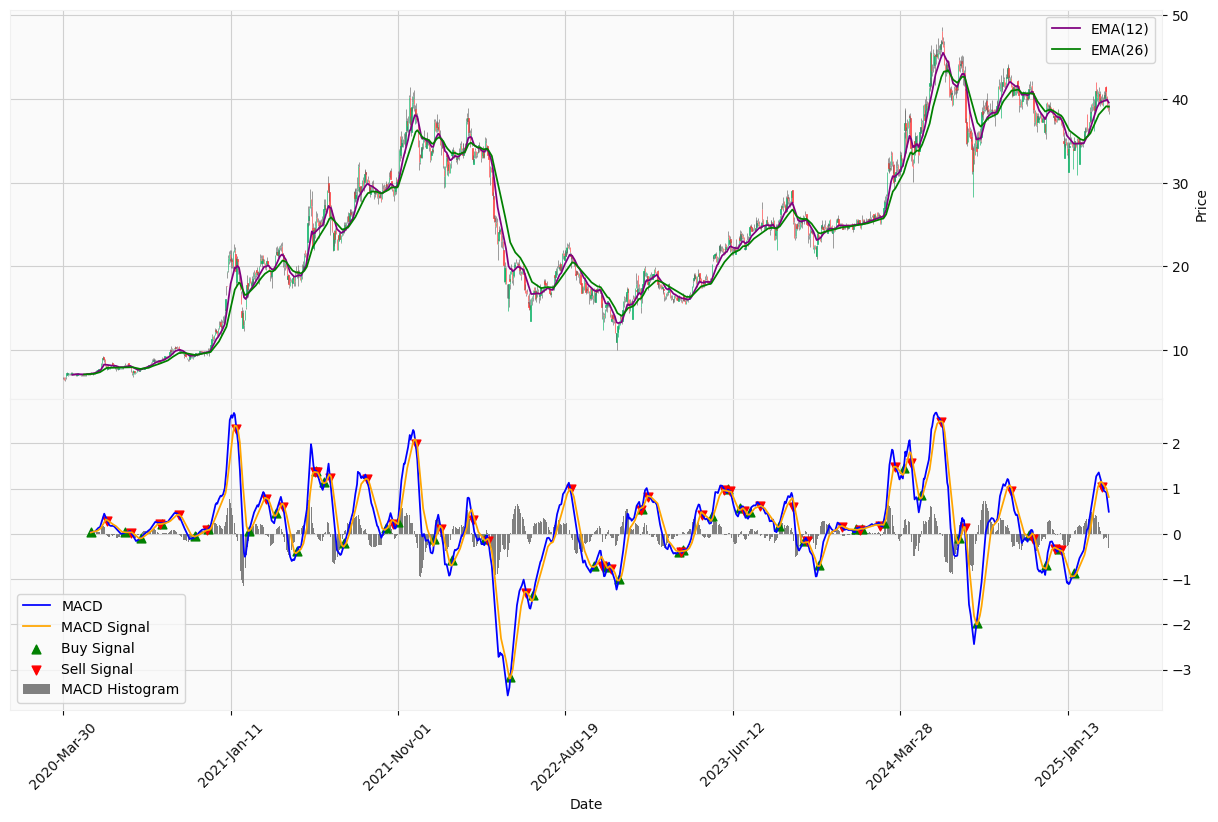

In [17]:
addplots = [
    mpf.make_addplot(df_MACD['EMA_12'], color='purple', label='EMA(12)'),
    mpf.make_addplot(df_MACD['EMA_26'], color='green', label='EMA(26)'),
    mpf.make_addplot(df_MACD['MACD'], color='blue', panel=1, label='MACD', secondary_y=False),
    mpf.make_addplot(df_MACD['MACD_signal'], color='orange', panel=1, label='MACD Signal',secondary_y=False),
    mpf.make_addplot(df_MACD['MACD_hist'], type='bar', color='grey', panel=1, label='MACD Histogram', secondary_y=False),
    mpf.make_addplot(df_MACD['Buy_Signal'], type='scatter', markersize=40, marker='^', color='green', panel =1, label='Buy Signal', secondary_y=False),
    mpf.make_addplot(df_MACD['Sell_Signal'], type='scatter', markersize=40, marker='v', color='red', panel =1, label='Sell Signal', secondary_y=False),
]
mpf.plot(df_MACD, 
         type='candle', 
         style='yahoo',
         xlabel='Date', 
         ylabel='Price', 
         addplot=addplots, 
         volume=False,
         figsize = (16, 10),
         panel_ratios=(1, 0.8),
         show_nontrading=False
         )

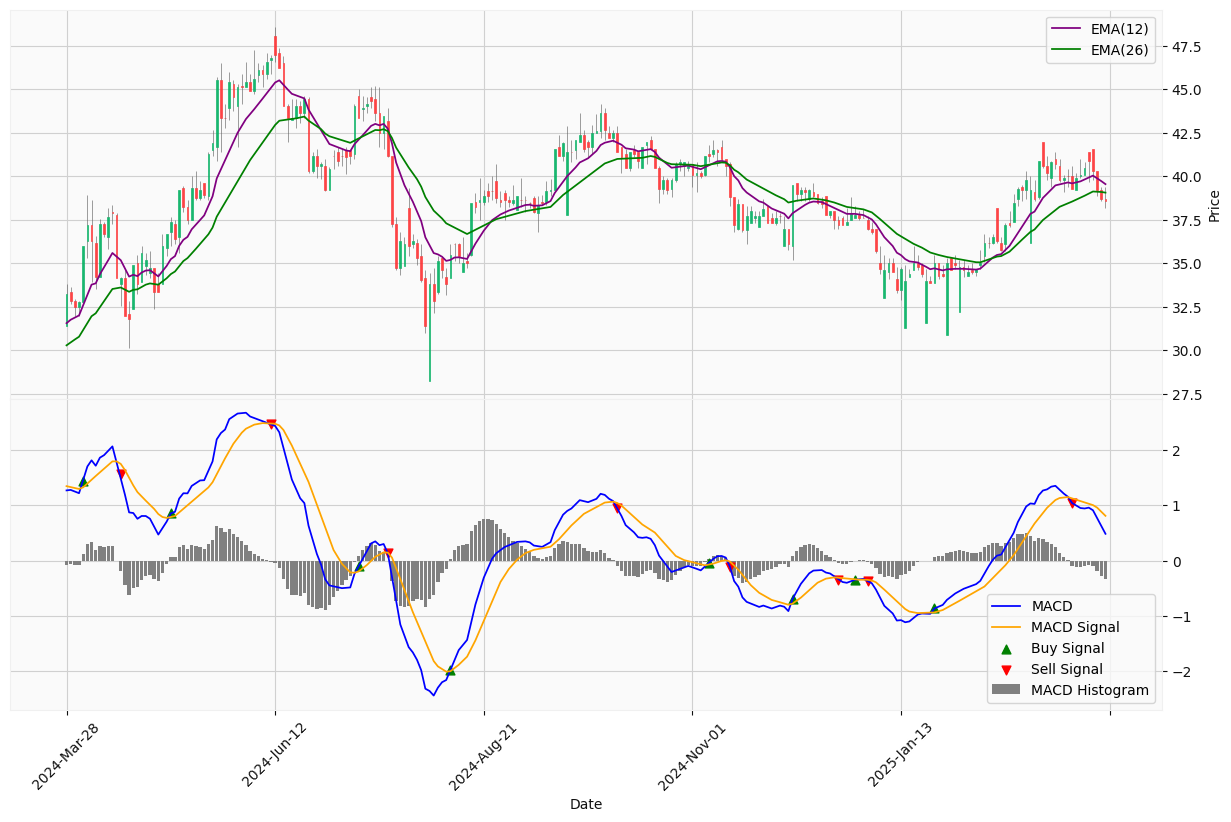

In [36]:
addplots = [
    mpf.make_addplot(df_MACD['EMA_12'].iloc[1000:1400], color='purple', label='EMA(12)'),
    mpf.make_addplot(df_MACD['EMA_26'].iloc[1000:1400], color='green', label='EMA(26)'),
    mpf.make_addplot(df_MACD['MACD'].iloc[1000:1400], color='blue', panel=1, label='MACD', secondary_y=False),
    mpf.make_addplot(df_MACD['MACD_signal'].iloc[1000:1400], color='orange', panel=1, label='MACD Signal',secondary_y=False),
    mpf.make_addplot(df_MACD['MACD_hist'].iloc[1000:1400], type='bar', color='grey', panel=1, label='MACD Histogram', secondary_y=False),
    mpf.make_addplot(df_MACD['Buy_Signal'].iloc[1000:1400], type='scatter', markersize=40, marker='^', color='green', panel =1, label='Buy Signal', secondary_y=False),
    mpf.make_addplot(df_MACD['Sell_Signal'].iloc[1000:1400], type='scatter', markersize=40, marker='v', color='red', panel =1, label='Sell Signal', secondary_y=False),
]
mpf.plot(df_MACD.iloc[1000:1400], 
         type='candle', 
         style='yahoo',
         xlabel='Date', 
         ylabel='Price', 
         addplot=addplots, 
         volume=False,
         figsize = (16, 10),
         panel_ratios=(1, 0.8),
         show_nontrading=False
         )

In [18]:
MACD_trades = []
MACD_buy_price = None
MACD_buy_date = None
for index, row in df_MACD_signals.iterrows():
    if row['Position']==1.0:
        MACD_buy_price = row['close']
        MACD_buy_date = index
    elif  row['Position'] ==-1.0 and MACD_buy_price is not None:
        MACD_sell_price = row['close']
        MACD_sell_date = index
        MACD_profit = MACD_sell_price - MACD_buy_price
        MACD_trades.append({
            'Buy_Date': MACD_buy_date,
            'Buy_Price': MACD_buy_price,
            'Sell_Date': MACD_sell_date,
            'Sell_Price': MACD_sell_price,
            'Profit': MACD_profit
        })
        MACD_buy_price= None
df_MACD_trades = pd.DataFrame(MACD_trades)
df_MACD_trades['Return_%'] = df_MACD_trades['Profit'] / df_MACD_trades['Buy_Price'] * 100
print(df_MACD_trades)
print(f"\nTotal return: {df_MACD_trades['Return_%'].sum():.2f}%")
print("Number of trades:", len(df_MACD_trades))
print(f"Win rate:  {len(df_MACD_trades[df_MACD_trades['Profit']>0]) / len(df_MACD_trades) * 100:.2f}%")
print(f"Average return per trade: {df_MACD_trades['Return_%'].mean():.2f}%")

     Buy_Date  Buy_Price  Sell_Date  Sell_Price  Profit    Return_%
0  2020-05-19       7.29 2020-06-15        7.70    0.41    5.624143
1  2020-07-15       8.18 2020-07-24        7.70   -0.48   -5.867971
2  2020-08-11       7.78 2020-09-14        8.67    0.89   11.439589
3  2020-09-16       8.99 2020-10-14       10.12    1.13   12.569522
4  2020-11-11       9.59 2020-12-01        9.59    0.00    0.000000
5  2020-12-02      10.03 2021-01-20       20.86   10.83  107.976072
6  2021-02-17      18.57 2021-03-17       20.15    1.58    8.508347
7  2021-04-02      21.47 2021-04-15       20.59   -0.88   -4.098742
8  2021-05-12      19.45 2021-06-11       24.82    5.37   27.609254
9  2021-06-14      25.78 2021-06-15       25.34   -0.44   -1.706749
10 2021-06-28      27.37 2021-07-07       26.84   -0.53   -1.936427
11 2021-07-30      24.99 2021-09-09       30.45    5.46   21.848739
12 2021-10-11      29.76 2021-10-22       28.58   -1.18   -3.965054
13 2021-11-01      31.02 2021-11-30       37.96 

In [19]:
#MACD Histogram Divergence

In [20]:
df_MACD_div = df_MACD.copy()

In [89]:
df_MACD_div['Bullish_divergence']= 0
df_MACD_div['Bearish_divergence']= 0
df_MACD_div['Buy_price']= np.nan
df_MACD_div['Sell_price']= np.nan
width = 30
#Bullish divergence
for i in range(len(df_MACD_div)):
    try:
        if df_MACD_div.iloc[i]['MACD_hist'] < 0 and df_MACD_div.iloc[i]['MACD_hist'] == df_MACD_div.iloc[i: i+ width]['MACD_hist'].min():
            for r in range(i+10, min(i + width, len(df_MACD_div))):
                if df_MACD_div.iloc[r]['MACD_hist'] < 0 and df_MACD_div.iloc[r]['close'] < df_MACD_div.iloc[i]['close'] and df_MACD_div.iloc[r]['MACD_hist'] - df_MACD_div.iloc[i]['MACD_hist'] > 0.02: #and r - i < 30:
                    for s in range(r+1, min(r + width, len(df_MACD_div))):
                        if df_MACD_div.iloc[s]['MACD_hist'] > df_MACD_div.iloc[r]['MACD_hist'] and df_MACD_div.iloc[s]['MACD_hist'] < 0:# and df_MACD_div.iloc[s]['close'] < df_MACD_div.iloc[s-1]['close']:
                            df_MACD_div.iloc[s+1, df_MACD_div.columns.get_loc('Bullish_divergence')] = 1
                            df_MACD_div.iloc[s+1, df_MACD_div.columns.get_loc('Buy_price')] = df_MACD_div.iloc[s+1]['close']  
                            i = s+1                                      
                            break                               
    except IndexError:
        pass
 
#Bearish divergence
for i in range(len(df_MACD_div)):
    try:
        if df_MACD_div.iloc[i]['MACD_hist'] > 0 and df_MACD_div.iloc[i]['MACD_hist'] == df_MACD_div.iloc[i:i+ width]['MACD_hist'].max():    
            for r in range(i+10, min(i + width, len(df_MACD_div))):
                if df_MACD_div.iloc[r]['MACD_hist'] > 0 and df_MACD_div.iloc[r]['close'] > df_MACD_div.iloc[i]['close'] and df_MACD_div.iloc[i]['MACD_hist'] - df_MACD_div.iloc[r]['MACD_hist'] > 0.02: #and r - i < 30:
                    for s in range(r+1, min(r + width, len(df_MACD_div))):
                        if df_MACD_div.iloc[s]['MACD_hist'] < df_MACD_div.iloc[r]['MACD_hist'] and df_MACD_div.iloc[s]['MACD_hist'] > 0:# and df_MACD_div.iloc[s]['close'] > df_MACD_div.iloc[s-1]['close']:                                
                            df_MACD_div.iloc[s+1, df_MACD_div.columns.get_loc('Bearish_divergence')] = -1
                            df_MACD_div.iloc[s+1, df_MACD_div.columns.get_loc('Sell_price')] = df_MACD_div.iloc[s+1]['close']     
                            i = s+1                          
                            break                                
    except IndexError:
        pass   
df_MACD_div_signals = df_MACD_div[(df_MACD_div['Bullish_divergence'] == 1) | (df_MACD_div['Bearish_divergence'] == -1)][['close', 'MACD_hist', 'Bullish_divergence', 'Buy_price',  'Bearish_divergence', 'Sell_price']]
print(df_MACD_div_signals)                                 
df_MACD_div_signals.to_csv("BVS_MACD_divergence_signals.csv")

            close  MACD_hist  Bullish_divergence  Buy_price  \
time                                                          
2020-07-23   8.10   0.005144                   0        NaN   
2020-07-24   7.70  -0.026004                   0        NaN   
2020-09-23   9.24   0.025950                   0        NaN   
2021-03-17  20.15  -0.019551                   0        NaN   
2021-04-15  20.59  -0.068231                   0        NaN   
2021-07-01  29.13   0.150078                   0        NaN   
2021-07-07  26.84  -0.066862                   0        NaN   
2021-10-29  29.85  -0.025358                   1      29.85   
2021-11-29  38.77   0.069335                   0        NaN   
2021-12-27  33.81  -0.235720                   1      33.81   
2021-12-28  33.81  -0.193469                   1      33.81   
2021-12-29  34.63  -0.102322                   1      34.63   
2022-02-08  33.90   0.102728                   1      33.90   
2022-04-08  32.82  -0.044121                   0       




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.



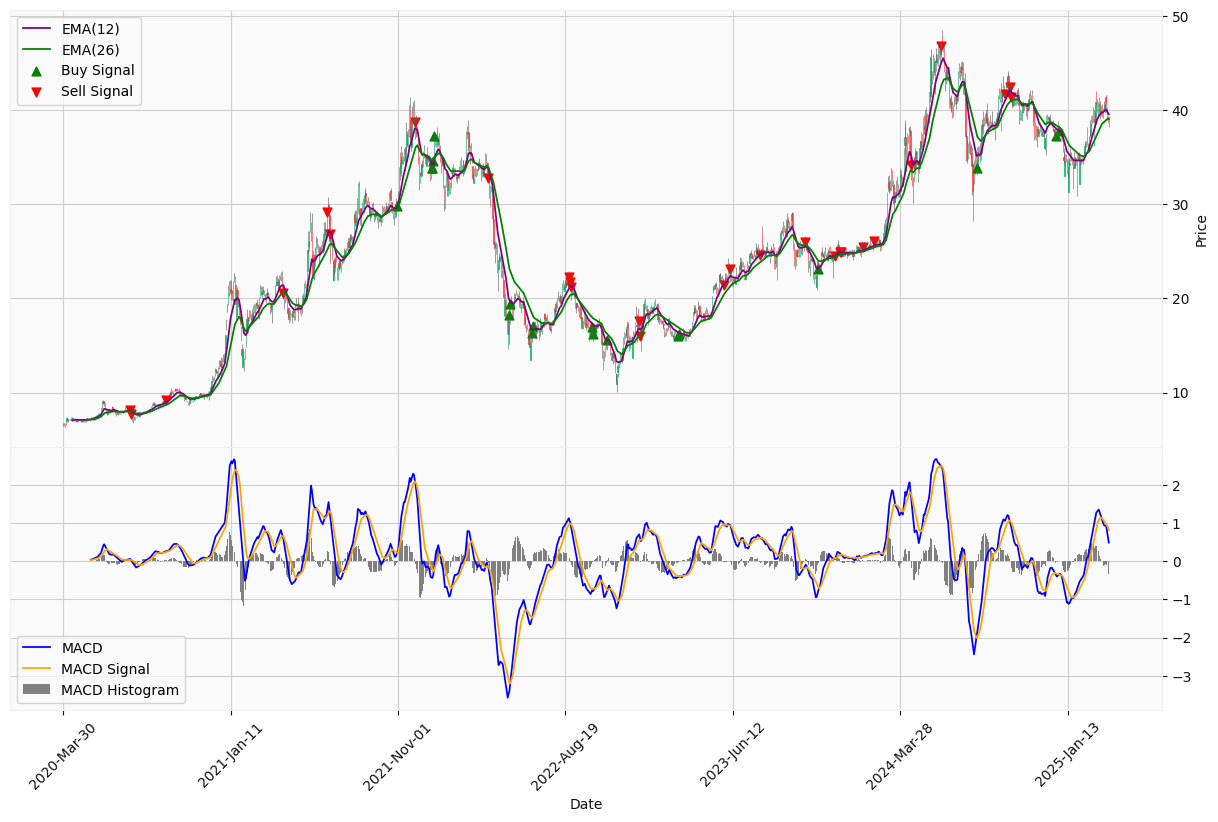

In [84]:
addplots = [
    mpf.make_addplot(df_MACD_div['EMA_12'], color='purple', label='EMA(12)'),
    mpf.make_addplot(df_MACD_div['EMA_26'], color='green', label='EMA(26)'),
    mpf.make_addplot(df_MACD_div['MACD'], color='blue', panel=1, label='MACD', secondary_y=False),
    mpf.make_addplot(df_MACD_div['MACD_signal'], color='orange', panel=1, label='MACD Signal',secondary_y=False),
    mpf.make_addplot(df_MACD_div['MACD_hist'], type='bar', color='grey', panel=1, label='MACD Histogram', secondary_y=False),
    mpf.make_addplot(df_MACD_div['Buy_price'], type='scatter', markersize=40, marker='^', color='green', label='Buy Signal', secondary_y=False),
    mpf.make_addplot(df_MACD_div['Sell_price'], type='scatter', markersize=40, marker='v', color='red', label='Sell Signal', secondary_y=False),
]
mpf.plot(df_MACD_div, 
         type='candle', 
         style='yahoo',
         xlabel='Date', 
         ylabel='Price', 
         addplot=addplots, 
         volume=False,
         figsize = (16, 10),
         panel_ratios=(1, 0.6),
         show_nontrading=False
         )

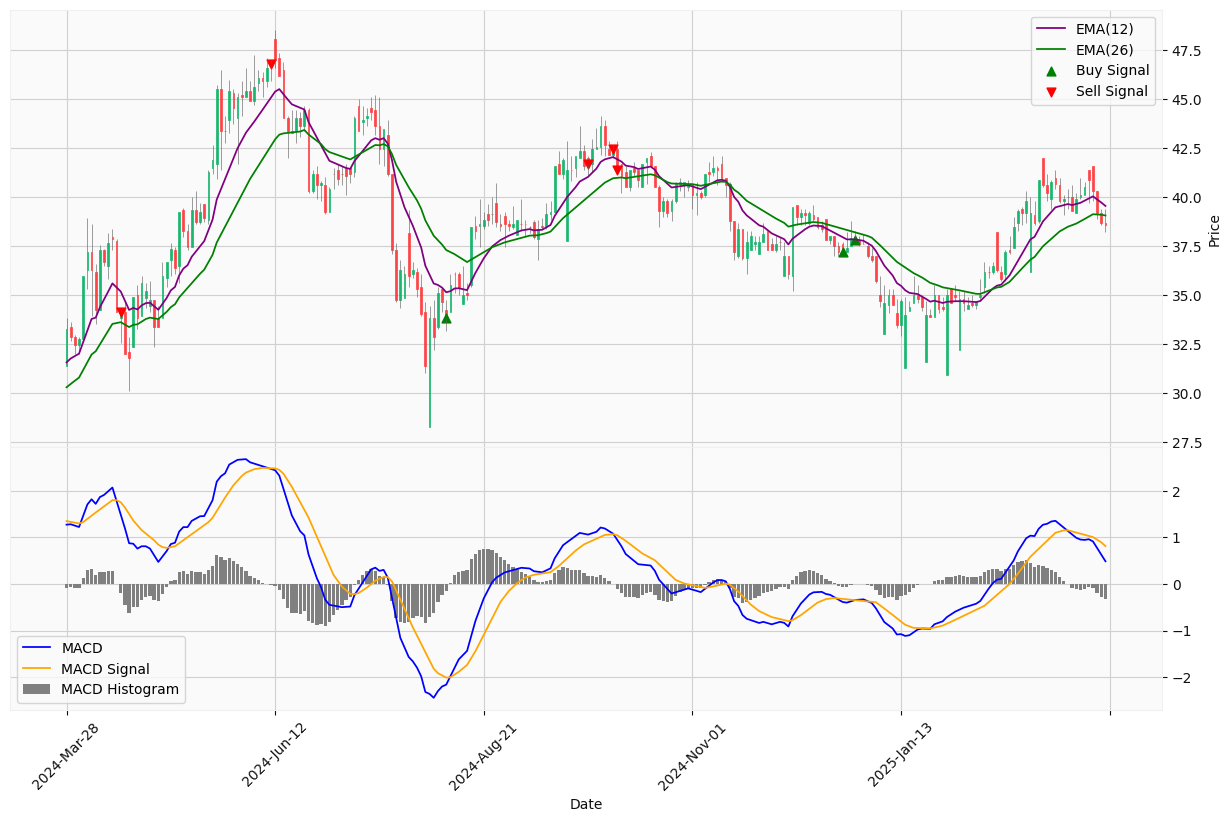

In [85]:
addplots = [
    mpf.make_addplot(df_MACD_div['EMA_12'].iloc[1000:1400], color='purple', label='EMA(12)'),
    mpf.make_addplot(df_MACD_div['EMA_26'].iloc[1000:1400], color='green', label='EMA(26)'),
    mpf.make_addplot(df_MACD_div['MACD'].iloc[1000:1400], color='blue', panel=1, label='MACD', secondary_y=False),
    mpf.make_addplot(df_MACD_div['MACD_signal'].iloc[1000:1400], color='orange', panel=1, label='MACD Signal',secondary_y=False),
    mpf.make_addplot(df_MACD_div['MACD_hist'].iloc[1000:1400], type='bar', color='grey', panel=1, label='MACD Histogram', secondary_y=False),
    mpf.make_addplot(df_MACD_div['Buy_price'].iloc[1000:1400], type='scatter', markersize=40, marker='^', color='green', label='Buy Signal', secondary_y=False),
    mpf.make_addplot(df_MACD_div['Sell_price'].iloc[1000:1400], type='scatter', markersize=40, marker='v', color='red', label='Sell Signal', secondary_y=False),
]
mpf.plot(df_MACD_div.iloc[1000:1400], 
         type='candle', 
         style='yahoo',
         xlabel='Date', 
         ylabel='Price', 
         addplot=addplots, 
         volume=False,
         figsize = (16, 10),
         panel_ratios=(1, 0.6),
         show_nontrading=False
         )

In [90]:
df_MACD_div['Position'] = 0
df_MACD_div.loc[df_MACD_div['Bullish_divergence'] == 1, 'Position'] = 1
df_MACD_div.loc[df_MACD_div['Bearish_divergence'] == -1, 'Position'] = -1
df_MACD_div['Buy_Signal'] = np.where(df_MACD_div['Position'] == 1, df_MACD_div['close'], np.nan)
df_MACD_div['Sell_Signal'] = np.where(df_MACD_div['Position'] == -1, df_MACD_div['close'], np.nan)
df_div_signals = df_MACD_div[(df_MACD_div['Position'] == 1) | (df_MACD_div['Position'] == -1)][['close', 'MACD_hist', 'Position', 'Buy_Signal', 'Sell_Signal']]
pending_buys = []
divergence_trades = []
for index, row in df_div_signals.iterrows():
    if row['Position'] == 1:
        pending_buys.append((index, row['close']))
    elif row['Position'] == -1 and pending_buys:
        div_buy_date, div_buy_price = pending_buys.pop(0)
        div_sell_price = row['close']
        div_sell_date = index
        div_profit = div_sell_price - div_buy_price
        divergence_trades.append({
            'Buy_Date': div_buy_date,
            'Buy_Price': div_buy_price,
            'Sell_Date': div_sell_date,
            'Sell_Price': div_sell_price,
            'Profit': div_profit
        })
df_div_trades = pd.DataFrame(divergence_trades)
df_div_trades['Return_%'] = df_div_trades['Profit'] / df_div_trades['Buy_Price'] * 100
print(df_div_trades)

print(f"\nTotal return: {df_div_trades['Return_%'].sum():.2f}%")
print("Number of trades:", len(df_div_trades))
print(f"Win rate:  {len(df_div_trades[df_div_trades['Profit'] > 0]) / len(df_div_trades) * 100:.2f}%")
print(f"Average return per trade: {df_div_trades['Return_%'].mean():.2f}%")


     Buy_Date  Buy_Price  Sell_Date  Sell_Price  Profit   Return_%
0  2021-10-29      29.85 2021-11-29       38.77    8.92  29.882747
1  2021-12-27      33.81 2022-04-08       32.82   -0.99  -2.928128
2  2021-12-28      33.81 2022-08-25       22.27  -11.54 -34.131914
3  2021-12-29      34.63 2022-08-26       21.73  -12.90 -37.250938
4  2022-02-08      33.90 2022-08-29       21.19  -12.71 -37.492625
5  2022-05-18      18.21 2022-12-21       17.28   -0.93  -5.107084
6  2022-05-19      19.39 2022-12-22       17.56   -1.83  -9.437855
7  2022-06-24      16.32 2022-12-23       17.65    1.33   8.149510
8  2022-06-27      17.04 2022-12-27       16.52   -0.52  -3.051643
9  2022-10-05      17.37 2023-05-26       21.43    4.06  23.373633
10 2022-10-06      16.99 2023-06-06       23.13    6.14  36.138905
11 2022-10-07      16.24 2023-07-26       24.64    8.40  51.724138
12 2023-03-02      16.24 2023-09-22       25.30    9.06  55.788177
13 2023-03-03      15.96 2023-10-12       26.00   10.04  62.90